In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_predict, cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier

In [2]:
df=pd.read_csv("Skyserver.csv")
df.head()

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,class,redshift,plate,mjd,fiberid
0,1.237650e+18,183.531326,0.089693,19.47406,17.04240,15.94699,15.50342,15.22531,752,301,4,267,3.722360e+18,STAR,-0.000009,3306,54922,491
1,1.237650e+18,183.598371,0.135285,18.66280,17.21449,16.67637,16.48922,16.39150,752,301,4,267,3.638140e+17,STAR,-0.000055,323,51615,541
2,1.237650e+18,183.680207,0.126185,19.38298,18.19169,17.47428,17.08732,16.80125,752,301,4,268,3.232740e+17,GALAXY,0.123111,287,52023,513
3,1.237650e+18,183.870529,0.049911,17.76536,16.60272,16.16116,15.98233,15.90438,752,301,4,269,3.722370e+18,STAR,-0.000111,3306,54922,510
4,1.237650e+18,183.883288,0.102557,17.55025,16.26342,16.43869,16.55492,16.61326,752,301,4,269,3.722370e+18,STAR,0.000590,3306,54922,512


In [3]:
#numbers of rows and columns
df.shape

(10000, 18)

In [4]:
#Describing the dataset
df.describe()

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,redshift,plate,mjd,fiberid
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.0,10000.000000,10000.000000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000
mean,1.237650e+18,175.529987,14.836148,18.619355,17.371931,16.840963,16.583579,16.422833,981.034800,301.0,3.648700,302.380100,1.645022e+18,0.143726,1460.986400,52943.533300,353.069400
std,1.577039e+05,47.783439,25.212207,0.828656,0.945457,1.067764,1.141805,1.203188,273.305024,0.0,1.666183,162.577763,2.013998e+18,0.388774,1788.778371,1511.150651,206.298149
min,1.237650e+18,8.235100,-5.382632,12.988970,12.799550,12.431600,11.947210,11.610410,308.000000,301.0,1.000000,11.000000,2.995780e+17,-0.004136,266.000000,51578.000000,1.000000
25%,1.237650e+18,157.370946,-0.539035,18.178035,16.815100,16.173333,15.853705,15.618285,752.000000,301.0,2.000000,184.000000,3.389248e+17,0.000081,301.000000,51900.000000,186.750000
50%,1.237650e+18,180.394514,0.404166,18.853095,17.495135,16.858770,16.554985,16.389945,756.000000,301.0,4.000000,299.000000,4.966580e+17,0.042591,441.000000,51997.000000,351.000000
75%,1.237650e+18,201.547279,35.649397,19.259232,18.010145,17.512675,17.258550,17.141447,1331.000000,301.0,5.000000,414.000000,2.881300e+18,0.092579,2559.000000,54468.000000,510.000000
max,1.237650e+18,260.884382,68.542265,19.599900,19.918970,24.802040,28.179630,22.833060,1412.000000,301.0,6.000000,768.000000,9.468830e+18,5.353854,8410.000000,57481.000000,1000.000000


In [5]:
#Getting the details of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   objid      10000 non-null  float64
 1   ra         10000 non-null  float64
 2   dec        10000 non-null  float64
 3   u          10000 non-null  float64
 4   g          10000 non-null  float64
 5   r          10000 non-null  float64
 6   i          10000 non-null  float64
 7   z          10000 non-null  float64
 8   run        10000 non-null  int64  
 9   rerun      10000 non-null  int64  
 10  camcol     10000 non-null  int64  
 11  field      10000 non-null  int64  
 12  specobjid  10000 non-null  float64
 13  class      10000 non-null  object 
 14  redshift   10000 non-null  float64
 15  plate      10000 non-null  int64  
 16  mjd        10000 non-null  int64  
 17  fiberid    10000 non-null  int64  
dtypes: float64(10), int64(7), object(1)
memory usage: 1.4+ MB


In [6]:
#Dropping unimportant fields
df=df.drop(columns=['objid','specobjid','run','rerun','camcol','field'])

In [7]:
df.head(10)

,ra,dec,u,g,r,i,z,class,redshift,plate,mjd,fiberid
0,183.531326,0.089693,19.47406,17.04240,15.94699,15.50342,15.22531,STAR,-0.000009,3306,54922,491
1,183.598371,0.135285,18.66280,17.21449,16.67637,16.48922,16.39150,STAR,-0.000055,323,51615,541
2,183.680207,0.126185,19.38298,18.19169,17.47428,17.08732,16.80125,GALAXY,0.123111,287,52023,513
3,183.870529,0.049911,17.76536,16.60272,16.16116,15.98233,15.90438,STAR,-0.000111,3306,54922,510
4,183.883288,0.102557,17.55025,16.26342,16.43869,16.55492,16.61326,STAR,0.000590,3306,54922,512
5,183.847174,0.173694,19.43133,18.46779,18.16451,18.01475,18.04155,STAR,0.000315,324,51666,594
6,183.864379,0.019201,19.38322,17.88995,17.10537,16.66393,16.36955,GALAXY,0.100242,287,52023,559
7,183.900081,0.187473,18.97993,17.84496,17.38022,17.20673,17.07071,STAR,0.000315,3306,54922,515
8,183.924588,0.097246,17.90616,16.97172,16.67541,16.53776,16.47596,STAR,0.000089,323,51615,595
9,183.973498,0.081626,18.67249,17.71375,17.49362,17.28284,17.22644,GALAXY,0.040508,288,52000,400


Check Missing Values

In [8]:
df.isnull().sum()

ra          0
dec         0
u           0
g           0
r           0
i           0
z           0
class       0
redshift    0
plate       0
mjd         0
fiberid     0
dtype: int64

In [9]:
df=df.apply(LabelEncoder().fit_transform)
df.corr()

,ra,dec,u,g,r,i,z,class,redshift,plate,mjd,fiberid
ra,1.000000,-0.099025,0.025992,0.034531,0.034917,0.034367,0.034826,-0.010821,0.003844,-0.043891,-0.053590,0.009121
dec,-0.099025,1.000000,0.027279,0.033889,0.029393,0.024513,0.021956,-0.043486,-0.003288,0.206556,0.050285,0.295278
u,0.025992,0.027279,1.000000,0.798355,0.644857,0.570774,0.507525,-0.251365,0.381865,-0.132412,-0.117060,0.007498
g,0.034531,0.033889,0.798355,1.000000,0.959572,0.917869,0.878222,-0.082563,0.376605,-0.057879,-0.036545,0.041139
r,0.034917,0.029393,0.644857,0.959572,1.000000,0.988125,0.969963,0.052573,0.252699,0.014348,0.033596,0.053719
i,0.034367,0.024513,0.570774,0.917869,0.988125,1.000000,0.992448,0.146682,0.167707,0.067876,0.084789,0.059608
z,0.034826,0.021956,0.507525,0.878222,0.969963,0.992448,1.000000,0.216925,0.103689,0.108868,0.122772,0.059731
class,-0.010821,-0.043486,-0.251365,-0.082563,0.052573,0.146682,0.216925,1.000000,-0.736648,0.598131,0.561797,0.045830
redshift,0.003844,-0.003288,0.381865,0.376605,0.252699,0.167707,0.103689,-0.736648,1.000000,-0.458514,-0.414052,-0.011767
plate,-0.043891,0.206556,-0.132412,-0.057879,0.014348,0.067876,0.108868,0.598131,-0.458514,1.000000,0.924727,0.192632


In [10]:
df['class'].value_counts()

0    4998
2    4152
1     850
Name: class, dtype: int64

In [11]:
df['mjd'].value_counts()

77     312
50     222
141    222
143    221
49     214
      ... 
312      1
288      1
276      1
284      1
0        1
Name: mjd, Length: 355, dtype: int64

# EDA

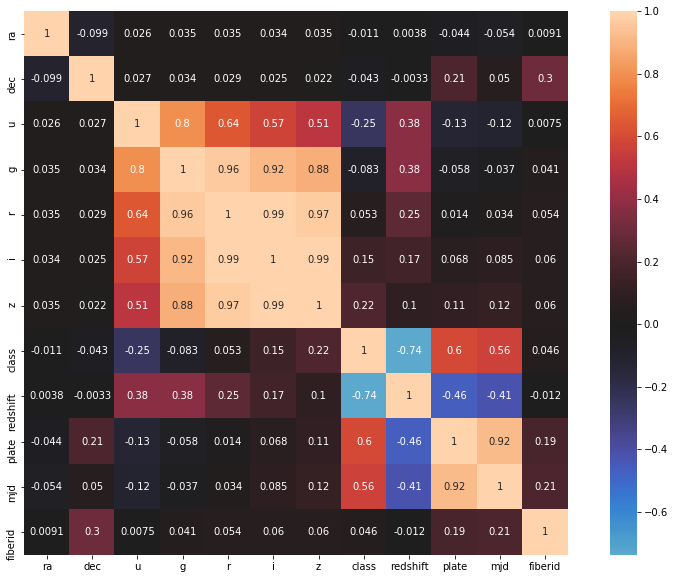

In [12]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),annot=True,square=True,center=0)
plt.show()

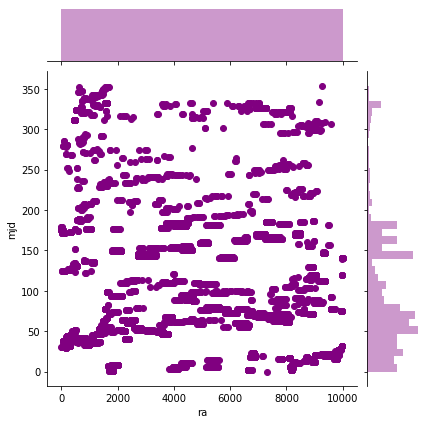

In [13]:
sns.jointplot(x='ra',y='mjd',data=df, color='purple')

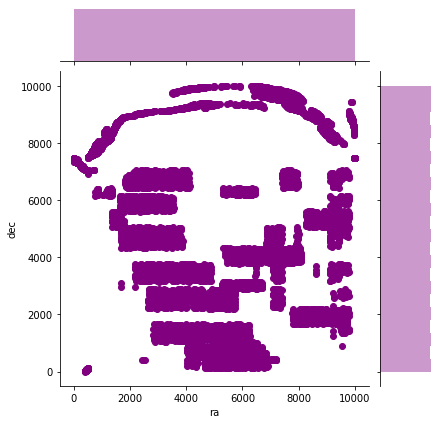

In [14]:
sns.jointplot(x='ra',y='dec',data=df, color='purple')

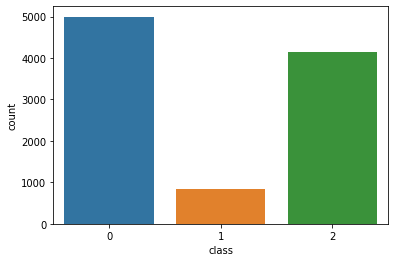

In [15]:
sns.countplot(x='class',data=df)

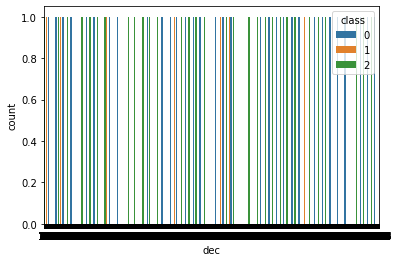

In [16]:
sns.countplot(df['dec'],hue=df['class'])

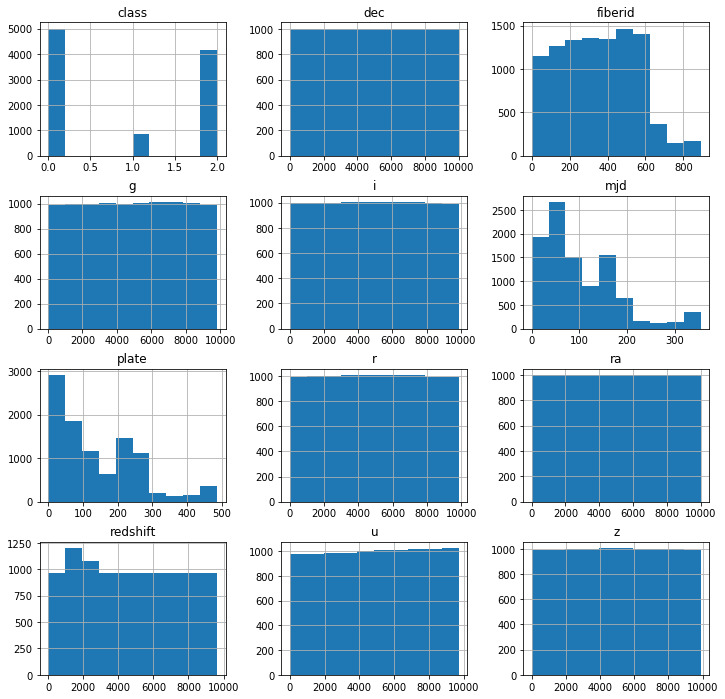

In [17]:
df.hist(figsize=(12,12))
plt.show()

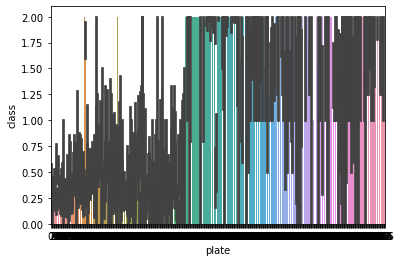

In [18]:
sns.barplot(df["plate"],df['class'])

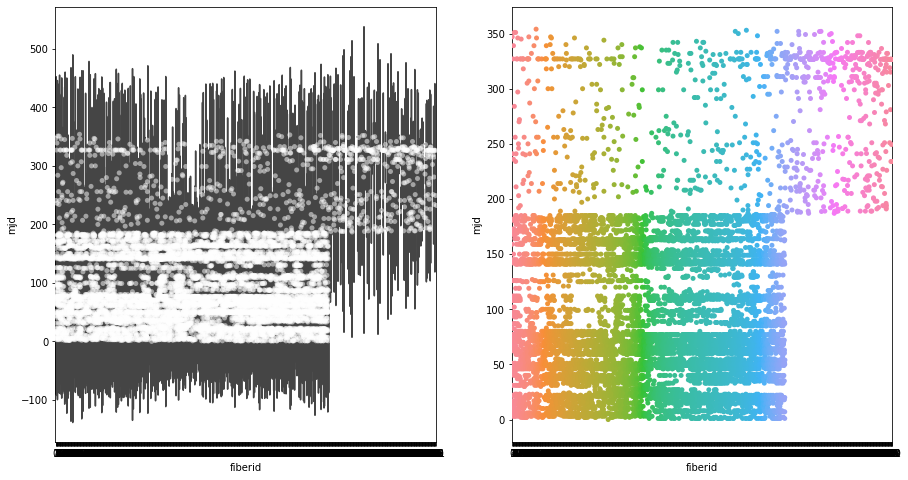

In [19]:
plt.figure(figsize=(15,8))
plt.subplot(121)
sns.violinplot(x="fiberid", y="mjd", data=df, inner=None)
sns.swarmplot(x="fiberid", y="mjd", data=df, color='w', alpha=0.5)


plt.subplot(122)
sns.swarmplot(x="fiberid", y="mjd", data=df)
plt.show()

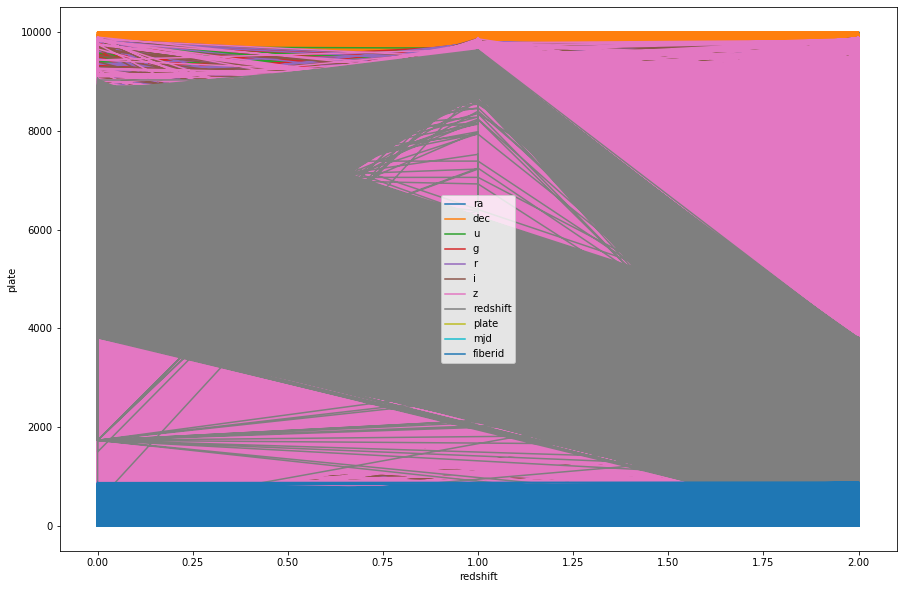

In [20]:
ax = df.set_index('class').plot(figsize=(15, 10))
ax.set_ylabel('plate')
ax.set_xlabel('redshift')

plt.show()

Data Processing

In [21]:
#Getting x and y from the dataset
X=df.drop(columns=['class'])
y=df.iloc[:,7].values

Train-Test Split

In [22]:
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.8)

In [23]:
algorithmPerfomanceDict = {}

In [24]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train, y_train)
logisticRegressionScore = lr.score(X_test, y_test)
print("Score of Logistic Regression : {0}".format(logisticRegressionScore))
algorithmPerfomanceDict['LogisticRegression'] = logisticRegressionScore

Score of Logistic Regression : 0.938


In [25]:
knn = KNeighborsClassifier(n_neighbors = 1) 
knn.fit(X_train, y_train)
knnScore = knn.score(X_test, y_test)
print("Score of KNN Regression : {0}".format(knnScore))
algorithmPerfomanceDict['KNeighborsClassifier'] = knnScore

Score of KNN Regression : 0.9635


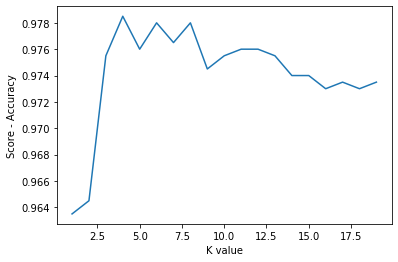

In [26]:
scoreList = []
for each in range(1, 20):
    optimumKnn = KNeighborsClassifier(n_neighbors = each)
    optimumKnn.fit(X_train, y_train)
    scoreList.append(optimumKnn.score(X_test, y_test))
    
plt.plot(range(1, 20), scoreList)
plt.xlabel("K value")
plt.ylabel("Score - Accuracy")
plt.show();

In [27]:
from sklearn.model_selection import GridSearchCV
grid = {'n_neighbors': np.arange(1, 50)}
knn = KNeighborsClassifier()
knn_cv = GridSearchCV(knn, grid, cv = 3)
knn_cv.fit(X, y)
print("Tuned hyperparameter k: {}".format(knn_cv.best_params_)) 
print("Best score: {}".format(knn_cv.best_score_))

Tuned hyperparameter k: {'n_neighbors': 19}
Best score: 0.9665009392360951


In [28]:
reg = LinearRegression()
k = 5
cv_result = cross_val_score(reg, X, y, cv = k) 
print('CV Scores : ',cv_result)
print('CV Average Score : ',np.sum(cv_result) / k)

CV Scores :  [0.74529202 0.72564836 0.74118013 0.73759966 0.7757219 ]
CV Average Score :  0.7450884147113535


In [29]:
svm = SVC(random_state = 42)
svm.fit(X_train, y_train)
svmScore = svm.score(X_test, y_test)
print("Accuracy of Support Vector Machine is : ", svmScore)
algorithmPerfomanceDict['SVM'] = svmScore

Accuracy of Support Vector Machine is :  0.987


In [30]:
nb = GaussianNB()
nb.fit(X_train, y_train)
nb.score(X_test, y_test)
naiveBayesScore = nb.score(X_test, y_test)
print("Accuracy of Naive Bayes Classifier is : ", naiveBayesScore)
algorithmPerfomanceDict['NaiveBayesClassifier'] = naiveBayesScore

Accuracy of Naive Bayes Classifier is :  0.941


In [31]:
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)
decisionTreeScore = dtc.score(X_test, y_test)
print("Accuracy of Decision Tree Classifier is : ", decisionTreeScore)
algorithmPerfomanceDict['DecisionTreeClassifier'] = decisionTreeScore

Accuracy of Decision Tree Classifier is :  0.9915


In [32]:
rfc = RandomForestClassifier(n_estimators = 100, random_state = 42) 
rfc.fit(X_train, y_train)
randomForestScore = rfc.score(X_test, y_test)
print("Accuracy of Random Forest Classifier is : ", randomForestScore)
algorithmPerfomanceDict['RandomForestClassifier'] = randomForestScore

Accuracy of Random Forest Classifier is :  0.991


In [33]:
algorithmPerfomanceDict

{'LogisticRegression': 0.938,
 'KNeighborsClassifier': 0.9635,
 'SVM': 0.987,
 'NaiveBayesClassifier': 0.941,
 'DecisionTreeClassifier': 0.9915,
 'RandomForestClassifier': 0.991}

In [34]:
comparisonData = pd.DataFrame.from_dict(algorithmPerfomanceDict, orient = 'index', columns = ["Accuracy"])
comparisonData.head(10)

,Accuracy
LogisticRegression,0.9380
KNeighborsClassifier,0.9635
SVM,0.9870
NaiveBayesClassifier,0.9410
DecisionTreeClassifier,0.9915
RandomForestClassifier,0.9910


# Conclusion
According to Comparison of Classifiers section DecisionTreeClassifier is the best option for this test data.

In [35]:
from sklearn.externals import joblib
joblib.dump(rfc,'HR_Analytics.obj')

['HR_Analytics.obj']